<h1>Loan Approval Prediction Project</h1>

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>

The company seeks to automate (in real time) the loan approval procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

<h3>2. Data Collection</h3>

Data is collected from AWS

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [30]:
df = pd.read_csv(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\raw_data\LoansTrainingSetV2 (1).csv")

In [31]:
df.shape

(111107, 19)

The data consists of 111107 rows and 19 columns

In [32]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The data has 9 Categorical Features and 10 Numerical Features

<h3>3. Performing Data Check</h3>

- Check for missing values
- Check Duplicates
- check Datatypes
- Check number of unique values in a column
- Check statistics of data set
- Check Various categories present in different categorical columns

<h4> 3.1 Check for Missing Values

<Axes: >

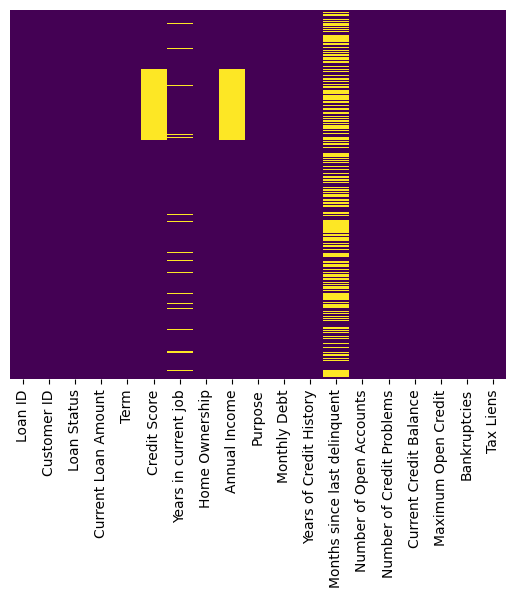

In [15]:
sns.heatmap(data=df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [28]:
null_percentage= df.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Credit Score                    19.204911
Years in current job             4.223856
Annual Income                   19.204911
Months since last delinquent    53.104665
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64


We can see that 6 columns have null valus with null percentage ranging from 0.009% to 53%

<h4>3.2 Check Duplicates